In [3]:
# https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [3]:
import pandas as pd
import math
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
import joblib

In [5]:
df = pd.read_csv('Clean_Dataset.csv')

In [7]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [11]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [13]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [15]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [17]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [19]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [21]:
df['class'].value_counts() #we can make a binary encoding

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [23]:
df['duration'].describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## Preprocessing

In [28]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

In [30]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [32]:
df.stops = pd.factorize(df.stops)[0]

In [34]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [36]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)

In [38]:
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,0,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,0,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,1,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,0,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,0,0,0,0,0,1
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,0,0,0,0,0,1
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,0,0,0,0,0,1
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,0,0,0,0,0,1


In [40]:
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [42]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [45]:
x, y = df.drop('price', axis=1), df.price

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [51]:
reg.score(x_test, y_test)

0.9851981180509503

In [53]:
y_pred = reg.predict(x_test)

In [55]:
print('R²:', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.9851981180509503
MAE 1069.6014285235096
MSE: 7618116.934375798
RMSE: 2760.0936459431587


Text(0.5, 1.0, 'Prediction VS Actual Price')

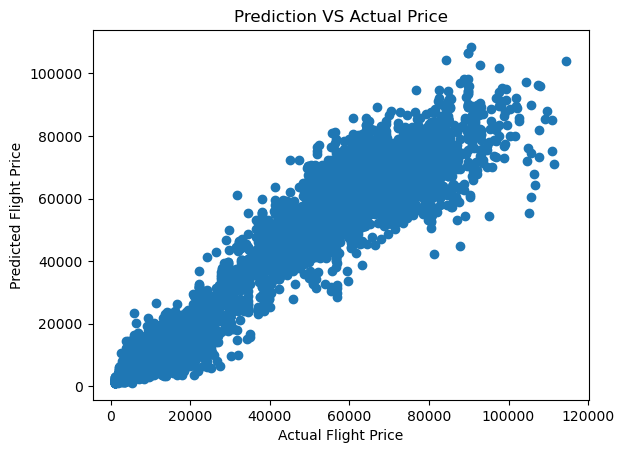

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [59]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

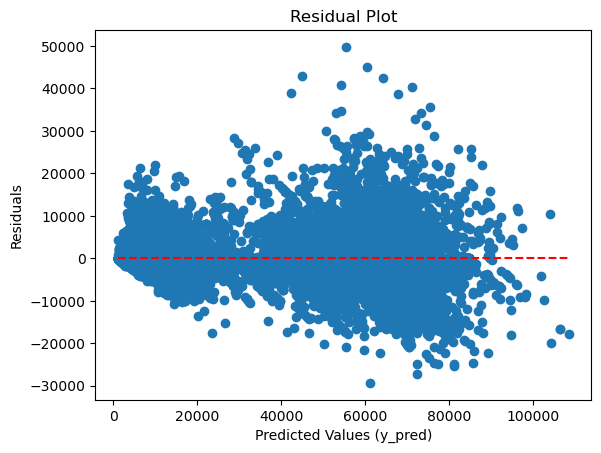

In [65]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')  # Zero line
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

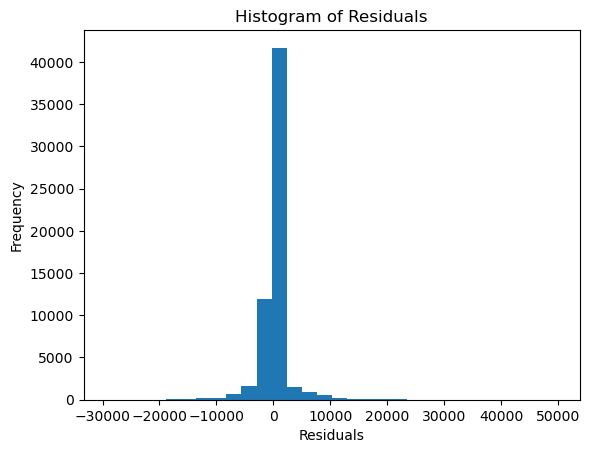

In [69]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [71]:
importances = pd.Series(reg.feature_importances_, index=x.columns)
sorted_importances = importances.sort_values(ascending=False)
sorted_importances

class                      0.880387
duration                   0.057487
days_left                  0.018514
airline_Vistara            0.005533
airline_Air_India          0.004360
source_Delhi               0.003808
dest_Delhi                 0.003460
source_Mumbai              0.002159
dest_Mumbai                0.001927
stops                      0.001794
dest_Kolkata               0.001786
source_Kolkata             0.001719
dest_Hyderabad             0.001497
arrival_Evening            0.001470
dest_Bangalore             0.001215
source_Hyderabad           0.001205
departure_Evening          0.001154
source_Bangalore           0.001124
arrival_Night              0.001092
arrival_Afternoon          0.001027
departure_Morning          0.000892
source_Chennai             0.000884
departure_Afternoon        0.000839
dest_Chennai               0.000825
departure_Early_Morning    0.000792
departure_Night            0.000758
arrival_Morning            0.000622
arrival_Early_Morning      0

In [73]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

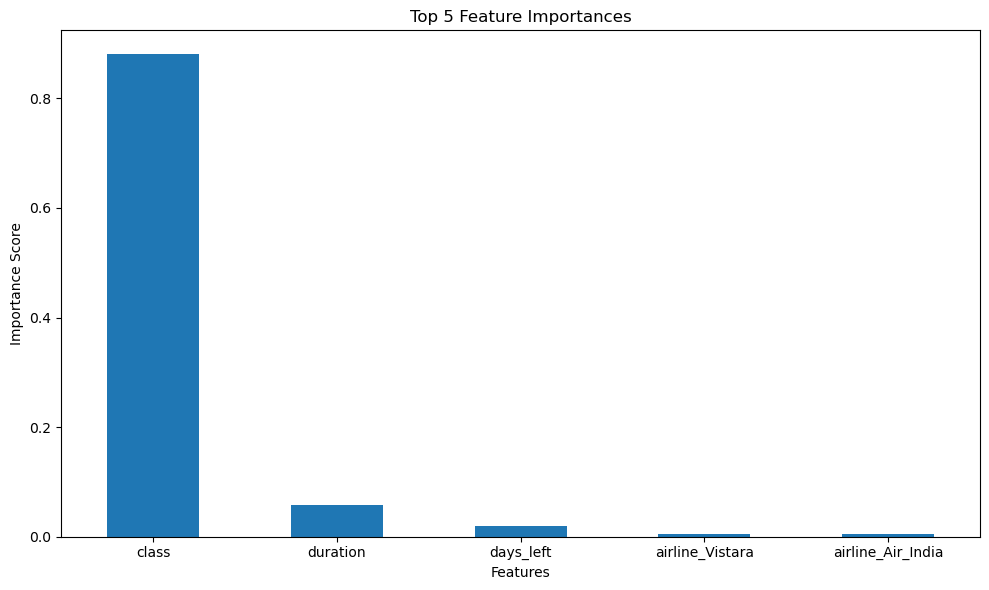

In [77]:
plt.figure(figsize=(10, 6))
sorted_importances.head(5).plot(kind='bar')
plt.title('Top 5 Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
'''
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt']
}


grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_params
'''
#I wanted to use GridSearchCV initially, but due to hardware limitations and the exhaustive nature of GridSearchCV, 
#I decided to use RandomizedSearchCV for a more computationally efficient approach.

"\nfrom sklearn.model_selection import GridSearchCV\n\nreg = RandomForestRegressor(n_jobs=-1)\n\nparam_grid = {\n    'n_estimators' : [100, 200, 300],\n    'max_depth' : [None, 10, 20, 30],\n    'min_samples_split' : [2, 5, 10],\n    'min_samples_leaf' : [1, 2, 4],\n    'max_features' : ['auto', 'sqrt']\n}\n\n\ngrid_search = GridSearchCV(reg, param_grid, cv=5)\ngrid_search.fit(x_train, y_train)\n\nbest_params = grid_search.best_params_\nbest_params\n"

In [37]:
param_dist = {
    'n_estimators' : randint(100, 300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1, 5),
    'max_features' : [1.0, 'log2', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1, max_samples=0.5)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=30, cv=3,
                                  scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [38]:
best_regressor.score(x_test, y_test)

0.9866266064645515

In [39]:
y_pred = best_regressor.predict(x_test)
print('R²:', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.9866266064645515
MAE 1145.3926524086373
MSE: 6927955.01937633
RMSE: 2632.100875607987


Text(0.5, 1.0, 'Prediction VS Actual Price')

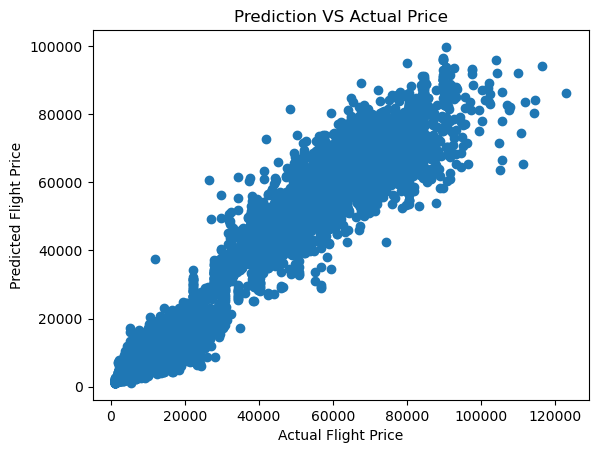

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [83]:
joblib.dump(best_regressor, 'flight_price_model.pkl')

['flight_price_model.pkl']